**Phase 3**

1) Now make only 1 data frame of two CSV files using the join operation of pandas and start doing EDA.

2) Do the complete EDA in detail to explore the insights of data and write detailed observations of each analysis.



**Phase 4**

1) Write the complete Machine learning code to make predictions of votes and gross collection. Use appropriate models on their label basis. Remember you need to make 2 different predictions: vote and gross collection.

2) Apply all the best techniques of scaling, and hyperparameter tuning, and avoid underfitting or overfitting (bias/variance)

3) At the end save the best model and convey on which basis you have chosen that model.  


# PHASE-3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("movie_1.csv")
df1

,Serial no,Movie Name,Director_1,Director_2,Director_3,Duration,Year,Ratings,Metascore
0,1,The Dark Knight,Christopher Nolan,NaN,NaN,152,2008,9.0,84.0
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,NaN,NaN,201,2003,9.0,94.0
2,3,Spider-Man: Across the Spider-Verse,Joaquim Dos San,Kemp Powers,Justin K. Thompson,140,2023,8.8,86.0
3,4,Inception,Christopher Nolan,NaN,NaN,148,2010,8.8,74.0
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NaN,NaN,178,2001,8.8,92.0
...,...,...,...,...,...,...,...,...,...
1745,1746,Escape Plan 2: Hades,Steven C. Mill,NaN,NaN,96,2018,3.9,NaN
1746,1747,The Adventures of Pluto Nash,Ron Underwood,NaN,NaN,95,2002,3.9,12.0
1747,1748,Batman & Robin,Joel Schumach,NaN,NaN,125,1997,3.8,28.0
1748,1749,In the Name of the King: A Dungeon Siege Tale,Uwe Boll,NaN,NaN,127,2007,3.8,15.0


In [3]:
df2=pd.read_csv("movie_2.csv")
df2

,MoviesName,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross,Certification,Popularity
0,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,761,452",Action,Crime,Drama,534.86,UA,40
1,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,907,397",Action,Adventure,Drama,377.85,U,299
2,Spider-Man: Across the Spider-Verse,hameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,"217,406",Animation,Action,Adventure,NaN,U,27
3,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,"2,451,672",Action,Adventure,Sci-Fi,292.58,UA,36
4,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,"1,935,556",Action,Adventure,Drama,315.54,U,145
...,...,...,...,...,...,...,...,...,...,...,...,...
1745,Escape Plan 2: Hades,ylvester Stallone,Dave Bautista,Xiaoming Huang,Jesse Metcalfe,"33,907",Action,Crime,Mystery,NaN,A,NaN
1746,The Adventures of Pluto Nash,Eddie Murphy,Jay Mohr,Randy Quaid,Rosario Dawson,"26,573",Action,Comedy,Sci-Fi,4.42,PG-13,NaN
1747,Batman & Robin,Arnold Schwarzenegge,George Clooney,Chris O'Donnell,Uma Thurman,"262,161",Action,Sci-Fi,NaN,107.33,U,814
1748,In the Name of the King: A Dungeon Siege Tale,Jason Statham,Ron Perlman,Ray Liotta,Leelee Sobieski,"50,367",Action,Adventure,Fantasy,4.54,UA,NaN


In [4]:
import pandas as pd
files = ['movie_1.csv', 'movie_2.csv']
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis=1)
    #Drop the duplicated column
df.to_csv('merged_files.csv', index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Serial no      1750 non-null   int64  
 1   Movie Name     1750 non-null   object 
 2   Director_1     1750 non-null   object 
 3   Director_2     108 non-null    object 
 4   Director_3     7 non-null      object 
 5   Duration       1750 non-null   int64  
 6   Year           1750 non-null   object 
 7   Ratings        1750 non-null   float64
 8   Metascore      1573 non-null   float64
 9   MoviesName     1750 non-null   object 
 10  Stars_1        1750 non-null   object 
 11  Stars_2        1749 non-null   object 
 12  Stars_3        1749 non-null   object 
 13  Stars_4        1748 non-null   object 
 14  Votes          1750 non-null   object 
 15  Genre_1        1750 non-null   object 
 16  Genre_2        1748 non-null   object 
 17  Genre_3        1605 non-null   object 
 18  Gross   

In [6]:
#df.drop("Unnamed: 0",axis=1,inplace=True)
#df.info()

In [7]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print("no of unique values",df[i].nunique())
    print('*****************')

1       1
1164    1
1175    1
1174    1
1173    1
       ..
580     1
579     1
578     1
577     1
1750    1
Name: Serial no, Length: 1750, dtype: int64
no of unique values 1750
*****************
Point Break                                      2
Beast                                            2
Total Recall                                     2
Heist                                            2
The Italian Job                                  2
                                                ..
Dragged Across Concrete                          1
Pacific Rim                                      1
The Amazing Spider-Man                           1
Jurassic World                                   1
In the Name of the King: A Dungeon Siege Tale    1
Name: Movie Name, Length: 1720, dtype: int64
no of unique values 1720
*****************
Michael Bay            15
Tony S                 13
Steven Spielberg       13
Roland Emmerich        12
Antoine Fuqua          12
                       .

In [8]:
df.replace("Nan", np.nan, inplace=True)
df.isnull().sum()

Serial no           0
Movie Name          0
Director_1          0
Director_2       1642
Director_3       1743
Duration            0
Year                0
Ratings             0
Metascore         177
MoviesName          0
Stars_1             0
Stars_2             1
Stars_3             1
Stars_4             2
Votes               0
Genre_1             0
Genre_2             2
Genre_3           145
Gross             287
Certification      71
Popularity        579
dtype: int64

In [9]:
df.drop(["Director_2","Director_3"], axis=1, inplace=True)

#### Using mode to fill null values for object columns - Metascore, Certification, Popularity and Genre 3

In [10]:
df['Metascore']=df['Metascore'].fillna(df['Metascore'].mode()[0])
df['Certification'] = df['Certification'].fillna(df['Certification'].mode()[0])
df['Genre_3'] =df['Genre_3'].fillna(df['Genre_3'].mode()[0])
df['Popularity'] =df['Popularity'].fillna(df['Popularity'].mode()[0])

First we converted column Gross collection to float dataype and then used mean to fill null values.

In [11]:
df['Gross'] = df['Gross'].astype(float)
df['Gross'] = df['Gross'].fillna(df['Gross'].mean())

In [12]:
#Clean the 'Votes' column by removing non-numeric characters
df['Year'] = df['Year'].str.replace(r'\D', '',regex=True)

# Convert the 'Votes' column to float
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


In [13]:
df.isnull().sum().sum()

6

In [14]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [15]:
df.duplicated().sum()

0

All null values have been treated or removed. No duplicates are there in the dataset.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 0 to 1749
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Serial no      1746 non-null   int64  
 1   Movie Name     1746 non-null   object 
 2   Director_1     1746 non-null   object 
 3   Duration       1746 non-null   int64  
 4   Year           1746 non-null   int64  
 5   Ratings        1746 non-null   float64
 6   Metascore      1746 non-null   float64
 7   MoviesName     1746 non-null   object 
 8   Stars_1        1746 non-null   object 
 9   Stars_2        1746 non-null   object 
 10  Stars_3        1746 non-null   object 
 11  Stars_4        1746 non-null   object 
 12  Votes          1746 non-null   object 
 13  Genre_1        1746 non-null   object 
 14  Genre_2        1746 non-null   object 
 15  Genre_3        1746 non-null   object 
 16  Gross          1746 non-null   float64
 17  Certification  1746 non-null   object 
 18  Populari

Treating all columns which should be integer datatype but are object datatype.

# EDA

In [17]:
df.columns

Index(['Serial no', 'Movie Name', 'Director_1', 'Duration', 'Year', 'Ratings',
       'Metascore', 'MoviesName', 'Stars_1', 'Stars_2', 'Stars_3', 'Stars_4',
       'Votes', 'Genre_1', 'Genre_2', 'Genre_3', 'Gross', 'Certification',
       'Popularity'],
      dtype='object')

# Duration

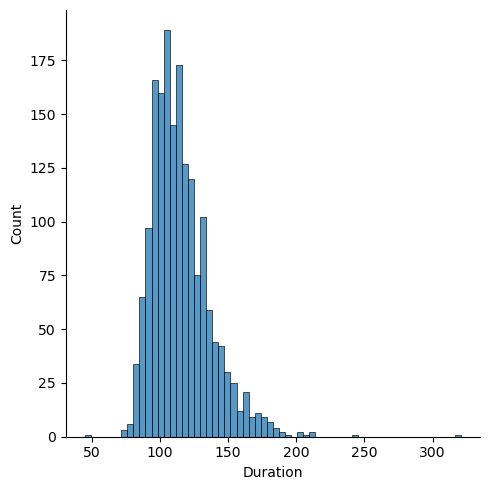

In [18]:
sns.displot(data=df, x="Duration",)

# Year

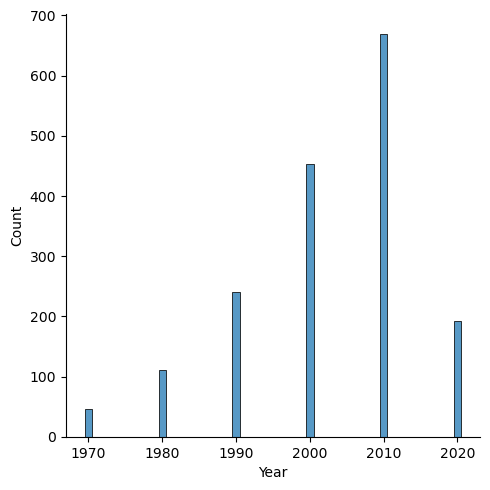

In [19]:
# Number of movies launched in the decades
sns.displot(pd.cut(df['Year'], bins=range(1970, 2031, 10), right=False, labels=range(1970, 2030, 10)))
plt.show()

Most movies have been launched in the decade of 2000-2010.

# Relation between years and ratings

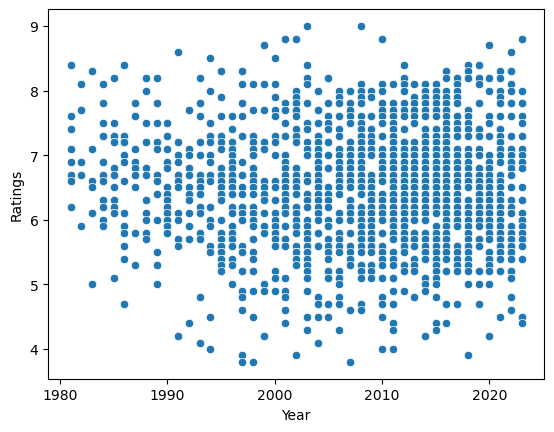

In [20]:
sns.scatterplot(x=df["Year"][df["Year"]>1980],y=df["Ratings"])
plt.show()

# Metascore

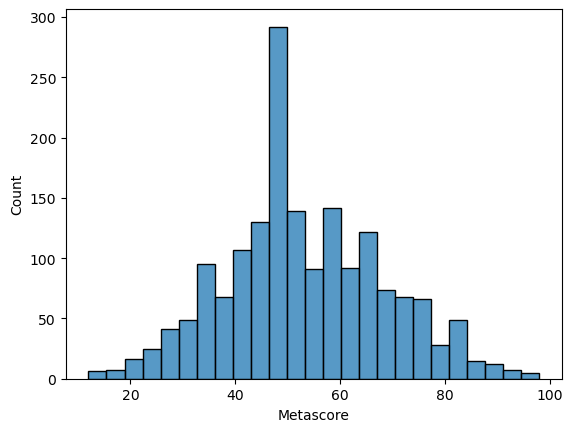

In [21]:
sns.histplot(x=df["Metascore"])
plt.show()

Metascore varies between 0 to 100 while most movies has metascore lies around 50

# Genre

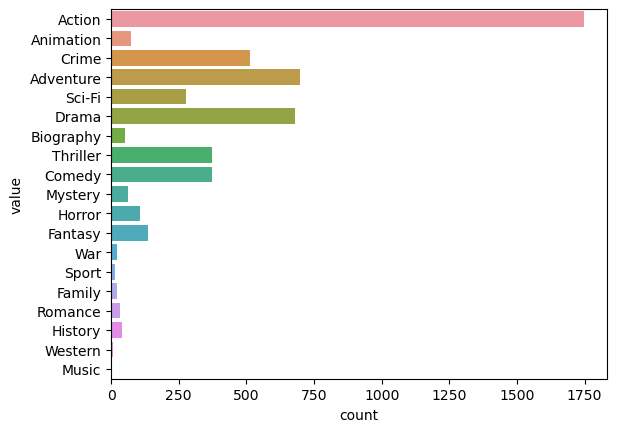

In [22]:
sns.countplot(data=pd.melt(df, value_vars=["Genre_1", "Genre_2", "Genre_3"]), y="value")
plt.show()

Most movies are of action genre. While crime, adventure Sci-fi and drama are most common genre.

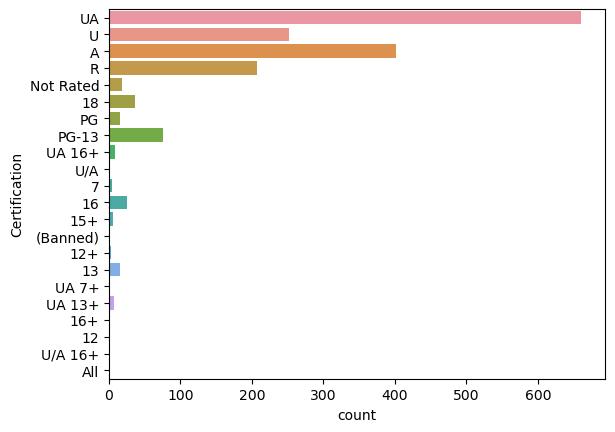

In [23]:
sns.countplot(y=df["Certification"])
plt.show()

#### Most movies are UA and A rated.

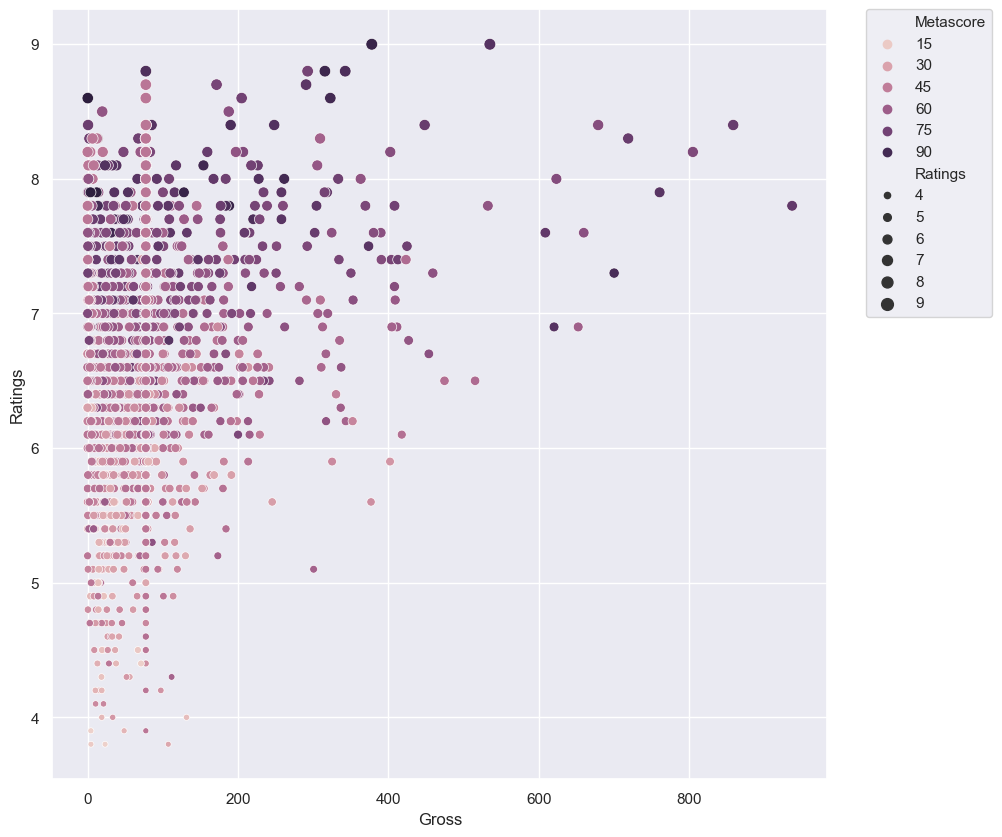

In [24]:
sns.set(font_scale=1)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="Gross", y="Ratings",
                      hue="Metascore", size="Ratings",
                      data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We can have the following conclusions :-

- Higher rated movies have been found to have higher gross collection.
- Even with high rating and metascore, movies have been found to be grossing below average.


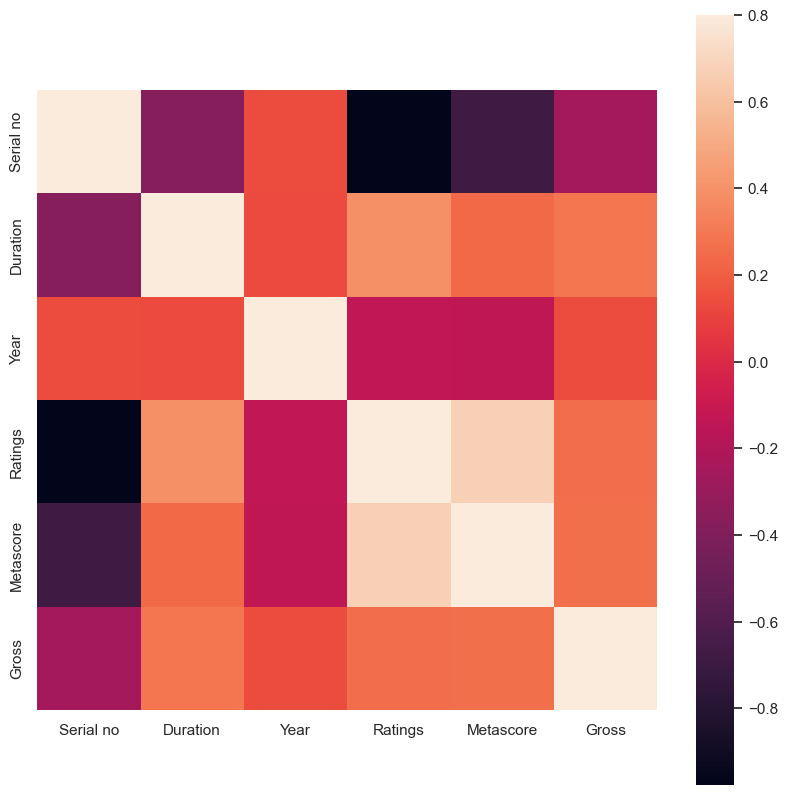

In [25]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), vmax=.8, square=True)
plt.show()

Metascore and rating are co related.

Gross collection and votes are co related.

# PHASE-4

# Preparing for machine learning
Dropping off columns which are not useful for machine learning

In [26]:
df.columns

Index(['Serial no', 'Movie Name', 'Director_1', 'Duration', 'Year', 'Ratings',
       'Metascore', 'MoviesName', 'Stars_1', 'Stars_2', 'Stars_3', 'Stars_4',
       'Votes', 'Genre_1', 'Genre_2', 'Genre_3', 'Gross', 'Certification',
       'Popularity'],
      dtype='object')

In [27]:
columns_to_drop = ["Serial no", "Movie Name", "MoviesName"]
df1 = df.drop(columns=columns_to_drop)

# Encoding the categorical data

In [28]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df1['Director_1']=le.fit_transform(df1['Director_1'])
df1['Stars_1']=le.fit_transform(df1['Stars_1'])
df1['Stars_2']=le.fit_transform(df1['Stars_2'])
df1['Stars_3']=le.fit_transform(df1['Stars_3'])
df1['Stars_4']=le.fit_transform(df1['Stars_4'])
df1['Genre_1']=le.fit_transform(df1['Genre_1'])
df1['Genre_2']=le.fit_transform(df1['Genre_2'])
df1['Genre_3']=le.fit_transform(df1['Genre_3'])
df1['Certification']=le.fit_transform(df1['Certification'])

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 0 to 1749
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Director_1     1746 non-null   int64  
 1   Duration       1746 non-null   int64  
 2   Year           1746 non-null   int64  
 3   Ratings        1746 non-null   float64
 4   Metascore      1746 non-null   float64
 5   Stars_1        1746 non-null   int64  
 6   Stars_2        1746 non-null   int64  
 7   Stars_3        1746 non-null   int64  
 8   Stars_4        1746 non-null   int64  
 9   Votes          1746 non-null   object 
 10  Genre_1        1746 non-null   int64  
 11  Genre_2        1746 non-null   int64  
 12  Genre_3        1746 non-null   int64  
 13  Gross          1746 non-null   float64
 14  Certification  1746 non-null   int64  
 15  Popularity     1746 non-null   object 
dtypes: float64(3), int64(11), object(2)
memory usage: 296.4+ KB


In [30]:

# Remove commas from 'Popularity' column
df1['Popularity'] = df1['Popularity'].str.replace(',', '')

# Convert 'Popularity' column to integers
df1['Popularity'] = df1['Popularity'].astype(int)

In [31]:
# Remove commas from 'Votes' column
df1['Votes'] = df1['Votes'].str.replace(',', '')

# Convert 'Votes' columns to integers
df1['Votes'] = df1['Votes'].astype(int)


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 0 to 1749
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Director_1     1746 non-null   int64  
 1   Duration       1746 non-null   int64  
 2   Year           1746 non-null   int64  
 3   Ratings        1746 non-null   float64
 4   Metascore      1746 non-null   float64
 5   Stars_1        1746 non-null   int64  
 6   Stars_2        1746 non-null   int64  
 7   Stars_3        1746 non-null   int64  
 8   Stars_4        1746 non-null   int64  
 9   Votes          1746 non-null   int64  
 10  Genre_1        1746 non-null   int64  
 11  Genre_2        1746 non-null   int64  
 12  Genre_3        1746 non-null   int64  
 13  Gross          1746 non-null   float64
 14  Certification  1746 non-null   int64  
 15  Popularity     1746 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 296.4 KB


All columns have been converted into integer or float datatype.

# Outlier Treatment
using z-score

In [33]:
z=np.abs(zscore(df1))
dfn=df1[(z<3).all(axis=1)]
dfn

,Director_1,Duration,Year,Ratings,Metascore,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross,Certification,Popularity
8,768,153,2020,8.7,48.0,716,866,1251,75,120323,0,5,4,77.457977,15,1005
13,247,163,2022,8.6,48.0,171,805,1009,1280,61982,0,5,10,77.457977,15,1005
20,279,137,1986,8.4,84.0,694,761,177,1043,739737,0,1,12,85.160000,15,263
21,568,101,2003,8.4,77.0,110,1146,639,735,604895,0,5,10,0.710000,9,265
23,449,145,2019,8.4,48.0,360,816,97,422,37072,0,1,3,77.457977,18,1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,757,102,1994,4.0,34.0,294,911,874,246,73703,0,1,2,33.420000,15,2979
1743,892,90,2011,4.0,22.0,518,292,206,703,26823,0,1,8,18.870000,9,3598
1744,291,121,1997,3.9,23.0,706,479,1286,1303,84295,0,1,3,48.610000,18,3599
1745,755,96,2018,3.9,48.0,717,246,1297,589,33907,0,4,10,77.457977,9,1005


In [34]:
df1

,Director_1,Duration,Year,Ratings,Metascore,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross,Certification,Popularity
0,147,152,2008,9.0,84.0,119,412,2,896,2761452,0,4,4,534.860000,18,40
1,595,201,2003,9.0,94.0,185,1099,462,1015,1907397,0,1,4,377.850000,15,299
2,325,140,2023,8.8,86.0,689,400,155,822,217406,1,0,0,77.457977,15,27
3,147,148,2010,8.8,74.0,410,563,350,720,2451672,0,1,12,292.580000,18,36
4,595,178,2001,8.8,92.0,185,431,939,1217,1935556,0,1,4,315.540000,15,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,755,96,2018,3.9,48.0,717,246,1297,589,33907,0,4,10,77.457977,9,1005
1746,678,95,2002,3.9,12.0,179,487,1007,1165,26573,0,3,12,4.420000,13,1005
1747,331,125,1997,3.8,28.0,54,376,210,1359,262161,0,10,4,107.330000,15,814
1748,821,127,2007,3.8,15.0,289,948,1012,774,50367,0,1,6,4.540000,18,1005


In [35]:
(1746-1475)*100/1746

15.52119129438717

15.5 % has been removed in outlier treatment, which is under considerable range.

# Skewness Treatment

In [36]:
dfn.skew()

Director_1      -0.072682
Duration         0.829692
Year            -0.960475
Ratings         -0.142919
Metascore        0.201739
Stars_1          0.058806
Stars_2         -0.036305
Stars_3          0.018597
Stars_4          0.021505
Votes            1.997376
Genre_1          0.000000
Genre_2          1.370025
Genre_3          0.369510
Gross            1.843142
Certification   -0.552333
Popularity       0.883954
dtype: float64

We will use power transform method to remove the skewness for columns with skewness greater than 0.5, except for gross collection and votes as we need to prepare models for them.

In [37]:
from sklearn.preprocessing import power_transform

for i in dfn.drop(["Gross","Votes"],axis=1).columns:
    if abs(dfn[f'{i}'].skew())>0.5:
        dfn[[f'{i}']]=power_transform(dfn[[f'{i}']],method='yeo-johnson')
        print("treated skewness for :",i)
    else:
        continue

treated skewness for : Duration
treated skewness for : Year
treated skewness for : Genre_2
treated skewness for : Certification
treated skewness for : Popularity


In [38]:
dfn.skew()

Director_1      -0.072682
Duration         0.023809
Year            -0.388352
Ratings         -0.142919
Metascore        0.201739
Stars_1          0.058806
Stars_2         -0.036305
Stars_3          0.018597
Stars_4          0.021505
Votes            1.997376
Genre_1          0.000000
Genre_2          0.067105
Genre_3          0.369510
Gross            1.843142
Certification   -0.284230
Popularity       0.013186
dtype: float64

Skewness has been removed from all the required columns

# To prepare model for Gross Collection.
Scaling of Independent features

In [39]:
X=dfn.drop(["Gross"],axis=1)
y=dfn["Gross"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

# Predicting the best random state

In [40]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.5318295564921007
At random state 0, The test accuracy is :-0.3117417698892694


At random state 1, The training accuracy is :-0.45444959441588606
At random state 1, The test accuracy is :-0.4988631248381643


At random state 2, The training accuracy is :-0.458009201884078
At random state 2, The test accuracy is :-0.5069720139823126


At random state 3, The training accuracy is :-0.4806538855145569
At random state 3, The test accuracy is :-0.4630123177931402


At random state 4, The training accuracy is :-0.48941963960851964
At random state 4, The test accuracy is :-0.42713017369174233


At random state 5, The training accuracy is :-0.5120817966560126
At random state 5, The test accuracy is :-0.3676799457355169


At random state 6, The training accuracy is :-0.4383355734915183
At random state 6, The test accuracy is :-0.5287183316601086


At random state 7, The training accuracy is :-0.46332036434005297
At random state 7, The test accuracy

At random state 68, The training accuracy is :-0.44959786540460434
At random state 68, The test accuracy is :-0.5247024024305572


At random state 69, The training accuracy is :-0.5089592288640247
At random state 69, The test accuracy is :-0.4108546661809347


At random state 70, The training accuracy is :-0.49900058103537115
At random state 70, The test accuracy is :-0.42365724978127817


At random state 71, The training accuracy is :-0.4891067184173298
At random state 71, The test accuracy is :-0.4462646199827416


At random state 72, The training accuracy is :-0.4742198208052062
At random state 72, The test accuracy is :-0.47714078702897356


At random state 73, The training accuracy is :-0.49653884384140756
At random state 73, The test accuracy is :-0.4243564000585516


At random state 74, The training accuracy is :-0.4841802299418635
At random state 74, The test accuracy is :-0.4562198069059994


At random state 75, The training accuracy is :-0.48501186478781577
At random state 75

In [41]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=66)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(1053, 15) (1053,)
(519, 15) (519,)


In [42]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 33.021319342662345
Mean Squared Error: 1756.7484703198115
Root Mean Squared Error: 41.913583362912455
R squared score:  0.49890333906058904
Cross Validation Score is : [0.27777838 0.37974994 0.482345   0.50068847 0.54753989]
Mean Score : 0.4376203361824434
Difference : -0.06128300287814564


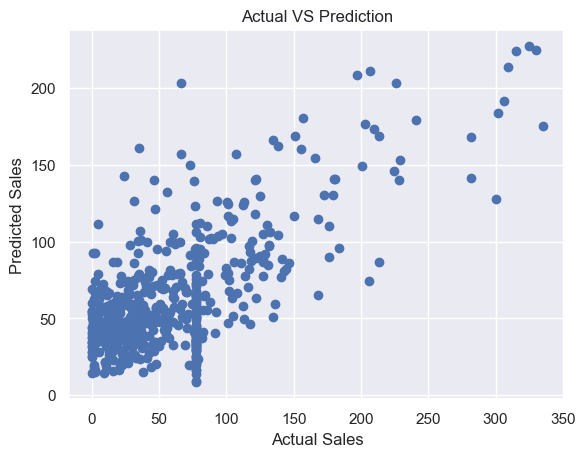



Scores for Lasso() are
Mean Absolute Error: 32.865564388442095
Mean Squared Error: 1752.9251572322644
Root Mean Squared Error: 41.867949044970715
R squared score:  0.4999939046448283
Cross Validation Score is : [0.29073145 0.38012246 0.49706691 0.49207363 0.54565858]
Mean Score : 0.44113060537254434
Difference : -0.05886329927228395


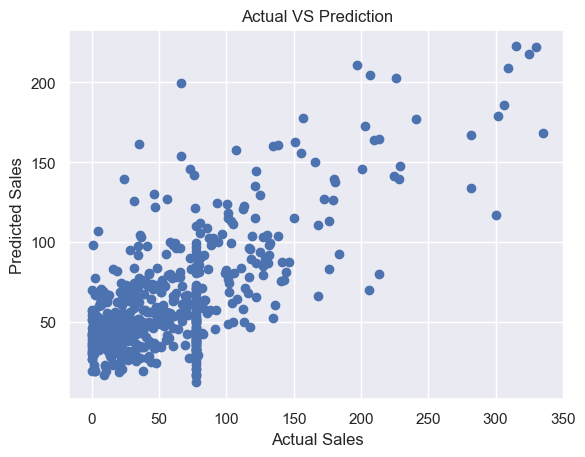



Scores for SVR() are
Mean Absolute Error: 37.90775839719069
Mean Squared Error: 2900.306647121857
Root Mean Squared Error: 53.85449514313412
R squared score:  0.17271368034345547
Cross Validation Score is : [0.1451793  0.1084253  0.13752246 0.11352948 0.10748472]
Mean Score : 0.12242825257853389
Difference : -0.05028542776492158


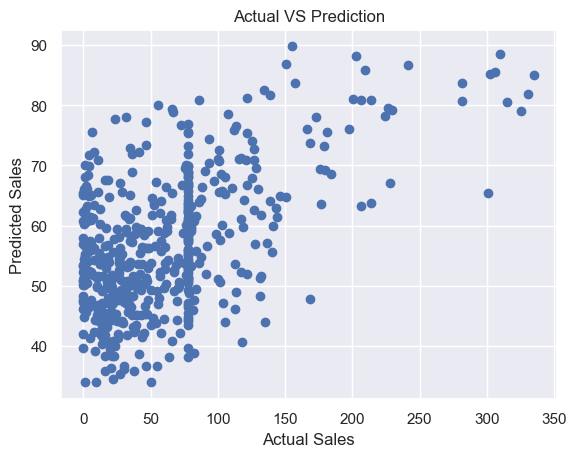



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 37.97006268956682
Mean Squared Error: 2936.434741974446
Root Mean Squared Error: 54.18888024285467
R squared score:  0.16240846704593737
Cross Validation Score is : [0.00509467 0.09064192 0.15970716 0.26753511 0.23845467]
Mean Score : 0.15228670445275855
Difference : -0.010121762593178818


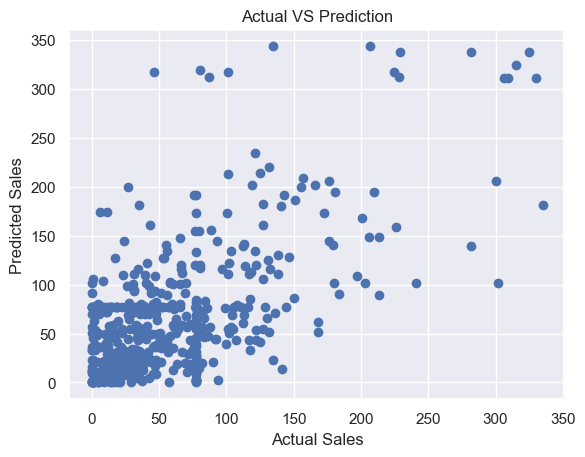



Scores for RandomForestRegressor() are
Mean Absolute Error: 29.56757170448456
Mean Squared Error: 1575.6463747276455
Root Mean Squared Error: 39.69441238672825
R squared score:  0.5505610788700016
Cross Validation Score is : [0.47036473 0.49914651 0.57450701 0.55830203 0.6360058 ]
Mean Score : 0.5476652166112945
Difference : -0.0028958622587070826


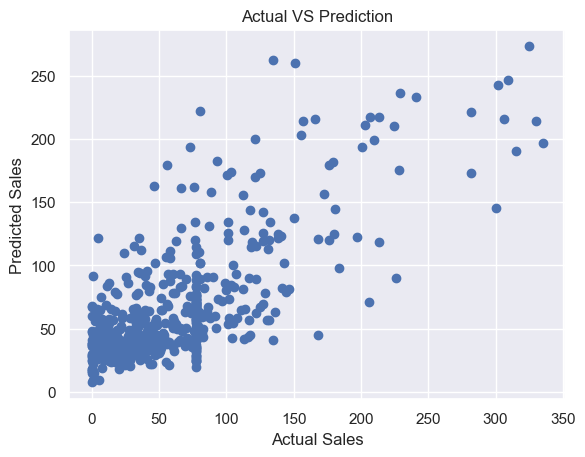



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 29.296075570850945
Mean Squared Error: 1523.9853017357307
Root Mean Squared Error: 39.038254337709965
R squared score:  0.5652969341242732
Cross Validation Score is : [0.43756076 0.53613644 0.60937899 0.55943684 0.63354594]
Mean Score : 0.5552117938645946
Difference : -0.010085140259678549


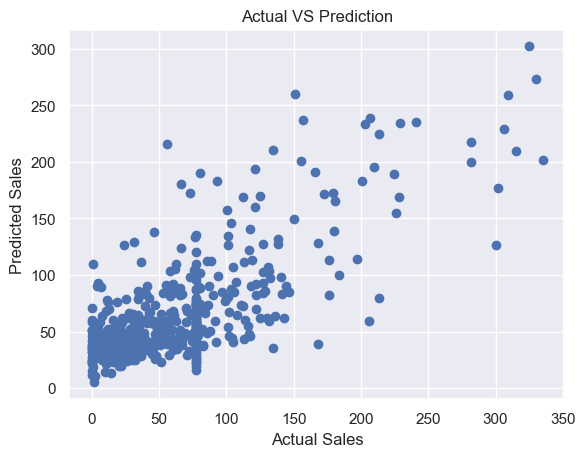

In [43]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

GradientBoostingRegressor() gives the best result. Gradient boosting builds models in a sequential manner, where each subsequent model corrects the mistakes of the previous model. As the dataset we have is small. It will give the best predictive result.

# Hyperparamter Tuning and treating overfitting/underfitting

In [44]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [45]:
param ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3]
}

In [46]:
gv=GridSearchCV(gbr,param, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'friedman_mse',
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [47]:
GB= GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.2,loss= 'squared_error',min_samples_split= 2,max_depth= 2,n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=68)
GB.fit(x_train,y_train)
GB_predict_train=GB.predict(x_train)
GB_predict_test=GB.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB_predict_test)))

The r2 score is: 0.5816632846648067
The mean absolute error 29.776645083423702
root_mean_squared_error: 38.95654585077263


In [48]:
import joblib
joblib.dump(GB,"gross_collection.obj")

['gross_collection.obj']

In [49]:
GB_l=joblib.load('gross_collection.obj')

# To prepare model for Number of votes.

# Scaling of Independent Features

In [50]:
X=dfn.drop(["Votes"],axis=1)
y=dfn["Votes"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

# Predicting the best random state

In [51]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :0.5829397451903167
At random state 0, The test accuracy is :0.4186946659546288


At random state 1, The training accuracy is :0.5211570484996727
At random state 1, The test accuracy is :0.5503917257651529


At random state 2, The training accuracy is :0.5320762436258972
At random state 2, The test accuracy is :0.5268971988853353


At random state 3, The training accuracy is :0.5314432485261443
At random state 3, The test accuracy is :0.5361903644690972


At random state 4, The training accuracy is :0.544535183671119
At random state 4, The test accuracy is :0.5025077075757605


At random state 5, The training accuracy is :0.5646934801129526
At random state 5, The test accuracy is :0.4554187321516554


At random state 6, The training accuracy is :0.5159603262956955
At random state 6, The test accuracy is :0.5586243916168725


At random state 7, The training accuracy is :0.5261960692787051
At random state 7, The test accuracy is :0.547185033999

At random state 70, The test accuracy is :0.46058940378095414


At random state 71, The training accuracy is :0.5509089609118536
At random state 71, The test accuracy is :0.4905891971067704


At random state 72, The training accuracy is :0.5346194659409549
At random state 72, The test accuracy is :0.5303526798714104


At random state 73, The training accuracy is :0.5533034442508744
At random state 73, The test accuracy is :0.48275495737163876


At random state 74, The training accuracy is :0.5430296355650394
At random state 74, The test accuracy is :0.5077500863505868


At random state 75, The training accuracy is :0.5297488515682529
At random state 75, The test accuracy is :0.5373585854287837


At random state 76, The training accuracy is :0.5239172744580499
At random state 76, The test accuracy is :0.5487145516326191


At random state 77, The training accuracy is :0.5495843133043861
At random state 77, The test accuracy is :0.49937496270690207


At random state 78, The training accur

In [52]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=1)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(1053, 15) (1053,)
(519, 15) (519,)


Scores for LinearRegression() are
Mean Absolute Error: 80641.29654934905
Mean Squared Error: 12604045139.003504
Root Mean Squared Error: 112267.73863850426
R squared score:  0.5503917257651529
Cross Validation Score is : [0.56063341 0.46961265 0.47415652 0.47643808 0.51466886]
Mean Score : 0.4991019049509662
Difference : -0.05128982081418676


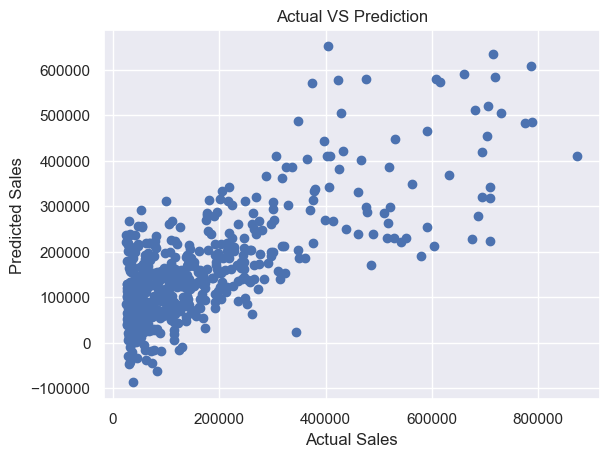



Scores for Lasso() are
Mean Absolute Error: 80641.02996485308
Mean Squared Error: 12604078748.748793
Root Mean Squared Error: 112267.88832408309
R squared score:  0.550390526846916
Cross Validation Score is : [0.56063261 0.46960987 0.47416126 0.47644183 0.51467641]
Mean Score : 0.4991043948124231
Difference : -0.05128613203449295


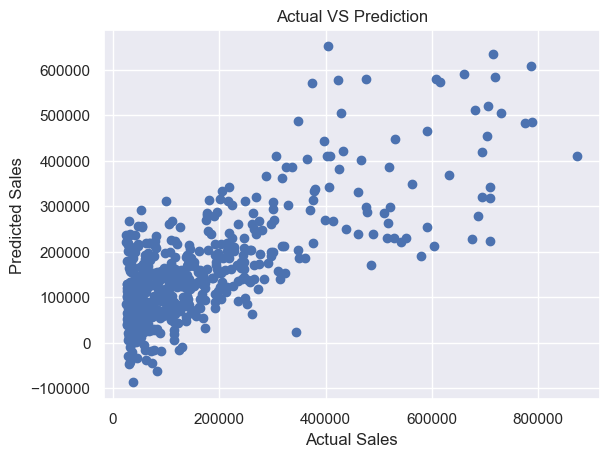



Scores for SVR() are
Mean Absolute Error: 113202.11733881928
Mean Squared Error: 33713575272.917904
Root Mean Squared Error: 183612.5683958424
R squared score:  -0.20262203360703301
Cross Validation Score is : [-0.16584883 -0.12909658 -0.1419709  -0.16355787 -0.1194714 ]
Mean Score : -0.1439891154049951
Difference : 0.05863291820203792


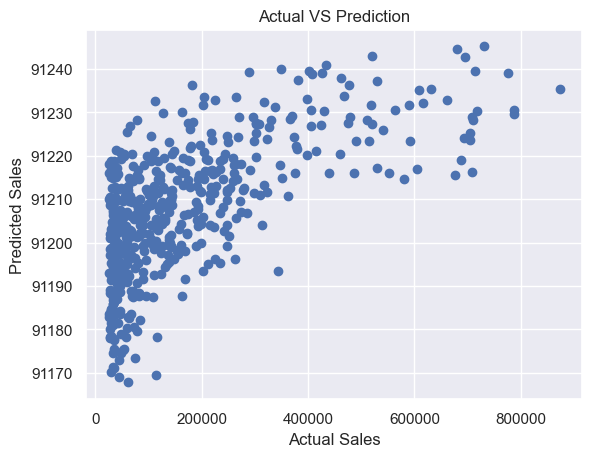



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 71158.84200385357
Mean Squared Error: 12102512952.256262
Root Mean Squared Error: 110011.42191725486
R squared score:  0.5682822536448782
Cross Validation Score is : [0.64289033 0.58290294 0.30937726 0.50976276 0.36237458]
Mean Score : 0.4814615734060667
Difference : -0.08682068023881145


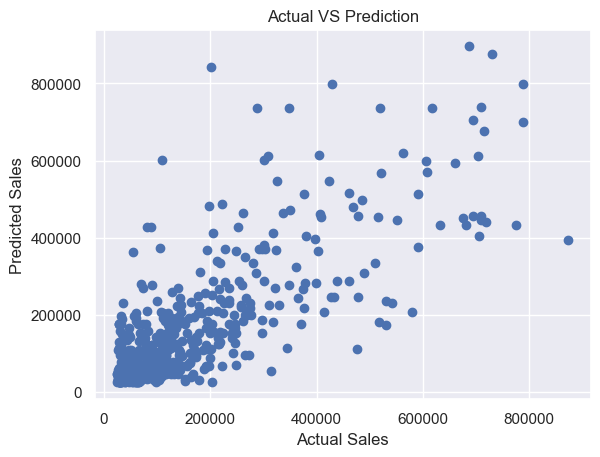



Scores for RandomForestRegressor() are
Mean Absolute Error: 49405.430558766864
Mean Squared Error: 5925571313.766143
Root Mean Squared Error: 76977.73258395016
R squared score:  0.7886245357854578
Cross Validation Score is : [0.77872587 0.76866086 0.66265834 0.73261398 0.69316881]
Mean Score : 0.7271655733506426
Difference : -0.06145896243481519


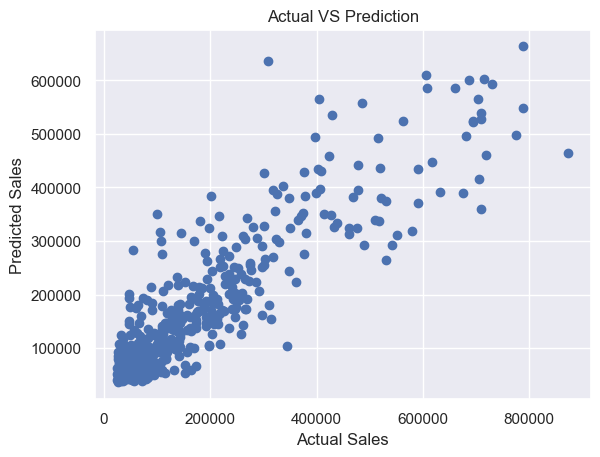



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 49879.770180880085
Mean Squared Error: 5662039480.250791
Root Mean Squared Error: 75246.52470546923
R squared score:  0.7980251759423328
Cross Validation Score is : [0.82042807 0.80806895 0.75330096 0.74476401 0.68547882]
Mean Score : 0.7624081613203343
Difference : -0.03561701462199851


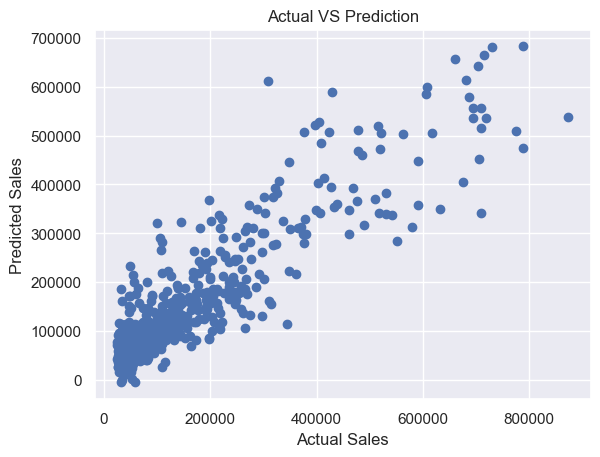

In [53]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

It is evident that GradientBoostingRegressor() gives the best result. Gradient boosting builds models in a sequential manner, where each subsequent model corrects the mistakes of the previous model. As the dataset we have is small. It will give the best predictive result.

# Hyperparamter Tuning and treating overfitting/underfitting

In [54]:
param1 ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'learning_rate':[0.1,0.2],
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3],
    'min_samples_leaf':[1,2]
}

In [55]:
gv=GridSearchCV(gbr,param1, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.2,
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [56]:
GB1= GradientBoostingRegressor(criterion='squared_error',
 learning_rate= 0.2,
 loss='huber',
 max_depth= 2,
 min_samples_leaf=2,
 min_samples_split= 2,
 n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
GB1.fit(x_train,y_train)
GB1_predict_train=GB1.predict(x_train)
GB1_predict_test=GB1.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB1_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB1_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB1_predict_test)))

The r2 score is: 0.8087352231577611
The mean absolute error 50372.949149796674
root_mean_squared_error: 73224.31648684063


In [57]:
import joblib
joblib.dump(GB1,"Votes.obj")

['Votes.obj']

In [58]:
GB1_l=joblib.load('Votes.obj')